# Image Classification Using MNIST

To install Anaconda, go to: 
<br>
https://www.anaconda.com/download/#macos
<br>
The link points to the mac version, but you should be automatically redirected to the appropriate distribution.

After installing Anaconda, check that you have Keras installed and that it uses Tensorflow backend. If not, run the following lines from your terminal:

In [25]:
# to install keras/ tensorflow:
# conda install -c conda-forge keras tensorflow

# when starting your session, ask keras to use tensorflow backend:
# KERAS_BACKEND=tensorflow python -c "from keras import backend"

In the following I am running you through an example of a simple neural network. This is just for anybody who (a) wants to check that the program runs as expected; and/or (b) wishes to gain the very first impression of what is coming. Notice that NONE of the following is a prequisite for attending the meeting.

## Load the data Set in Keras

For those who want to test Keras, the following example is useful. This is an image classification problem that is used as "Hello world" of neural network. For later on, it is useful for checking that your code works.

Warning: the following will install the data on your computer!

In [2]:
from keras.datasets import mnist

The data contains images and labels and is devided into train and test sets. The images are greyscale handwritten numbers from 0-9.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


Let's look at an example of such a digit:

AxesImage(54,36;334.8x217.44)


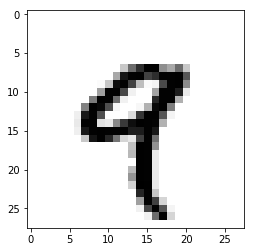

In [24]:
import matplotlib.pyplot as plt
print(plt.imshow(train_images[4], cmap = plt.cm.binary))

The images are encoded as Numpy arrays, the labels as an array of digits from 0-9. In general, Keras takes a list of numpy arrays as an input. Let's check how it looks like. First, using the training sample, we find

In [21]:
# dimension of the input array: 60,000 images, 28x28 pixels
print(train_images.shape)

# length of the 
print(len(train_labels))

# display the training labels
print(train_labels)

# display a subsample of the input arrays
print(train_images[5:7][1:2])

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0  

Let's repeat this for the test data: here we have 10,000 images

In [20]:
# dimension of the input array
print(test_images.shape)

# length of the 
print(len(test_labels))

# display the training labels
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


## Network Architecture

When classifying data, a neural network uses hidden layers as building blocks. Loosely speaking, the layers process the data in more and more recognizable form with the help of mathematical models. If you do not know yet how this works, do not worry too much about it. Let's focus on checking that everything works.

In [27]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

## Compilation

Next, we compile our model. Towards that end, we need a loss function to capture how well our model is currently performing and an optimization function to tell us how to improve it. To measure the performance, we also need a meaningful metrics.

In [29]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

## Preparing the Data

Before training the model, we will need to reshape the data into the form in which the network expects it. In particular, we need to rescale the input values from the interval [0, 255] into [0, 1].

In [31]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32')/255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32')/255

We also need a categorial enlabeling of the labels. The method converts a class vector (integers) to binary class matrix and is needed for categorical_crossentropy.

In [33]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Fit the Model

We are now ready to fit the model into the data.

In [34]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 1.4749 - acc: 0.6623
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.5826 - acc: 0.8552
Epoch 3/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.4089 - acc: 0.8889
Epoch 4/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.3515 - acc: 0.9006
Epoch 5/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.3224 - acc: 0.9079


Finally, we need to check how the model performs in the test set.

In [35]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 50us/step


In [36]:
print(test_loss, test_acc)

2.7654049230119213 0.8238
